In [1]:
# import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns               # to make it prettier
%matplotlib inline
path = 'Data/normal_questions.csv'
# read the csv file and convert to a pandas DataFrame, store the DataFrame in 
# variable complaints
df = pd.read_csv(path)

In [2]:
# Remove the Timestamp column and handle missing values
df = df.drop('Timestamp', axis=1)
df = df.fillna('No Response')

# Convert categorical variables to boolean
df_encoded = pd.get_dummies(df)

# Calculate the correlation matrix
corr_matrix = df_encoded.corr() # uses the pearson chi squared measure for correlation (Cramers V would be normalised better but was a bit complicated)

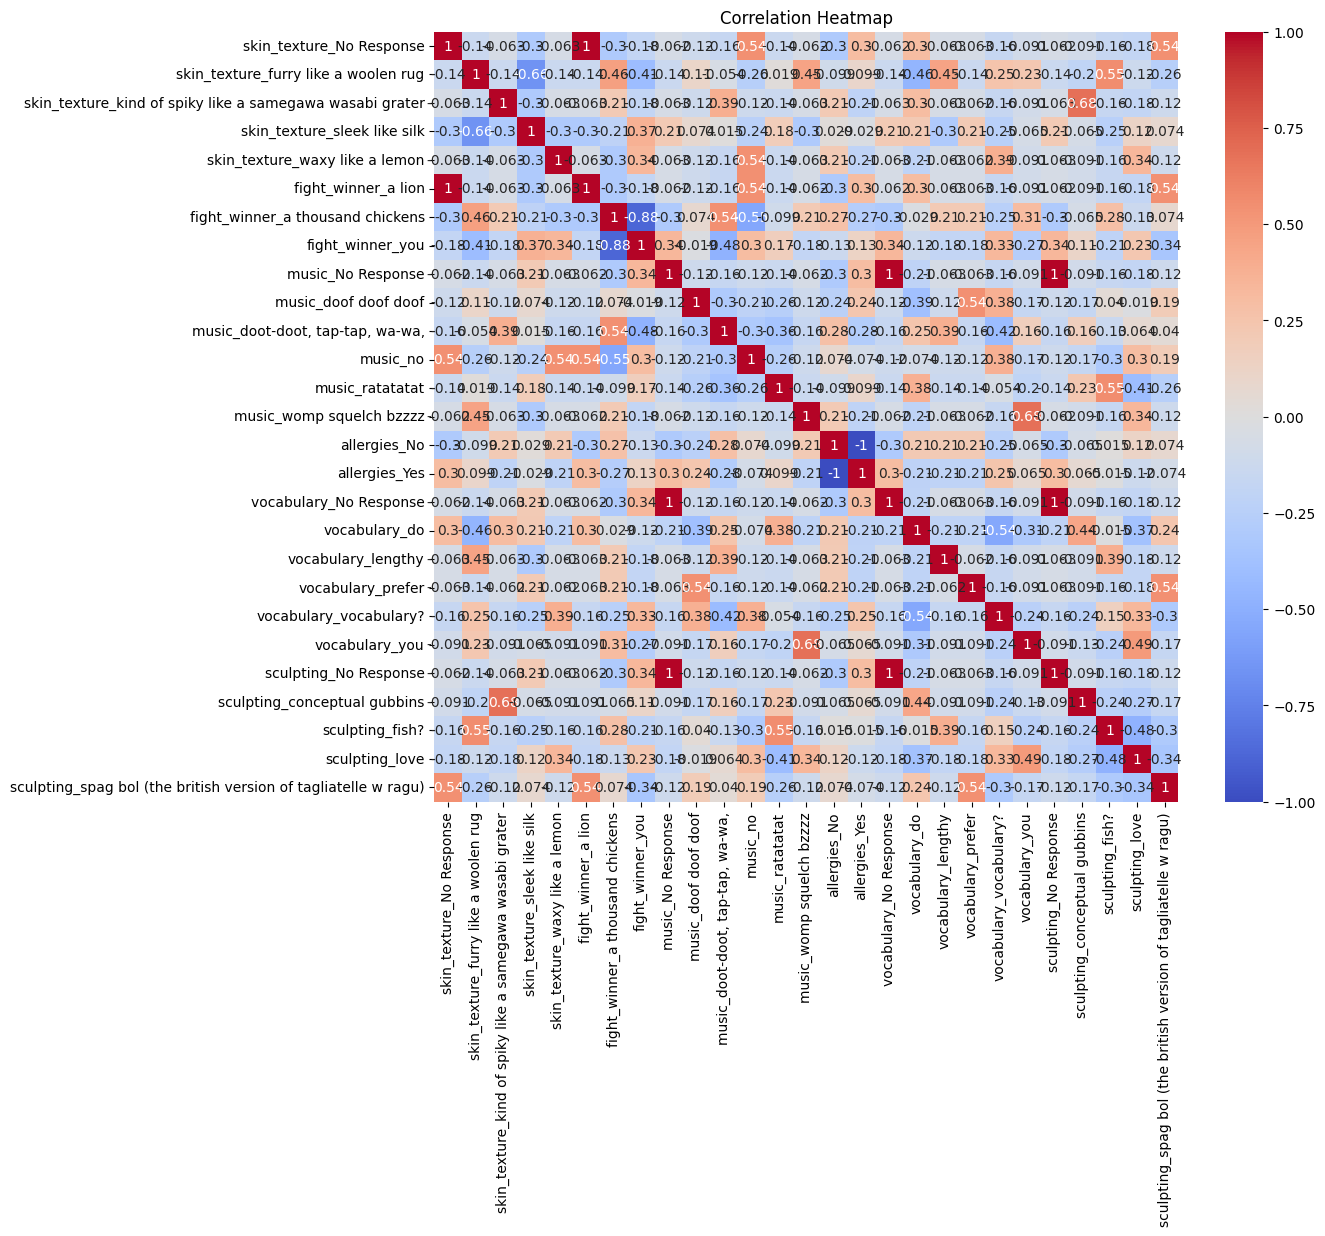

In [21]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

I found this .corr() function which seems to do what I wanted, but I'm not totally happy that I understand this pearson chi squared business,
or that it's the most appropriate way to draw a correlation. so I'll try another method too. 

In [20]:
# Get the list of questions
questions = df.columns

# Function to calculate an association score
def association_score(x, y):
    crosstab = pd.crosstab(x, y)
    return (crosstab.max(axis=1).sum() - len(crosstab)) / (len(x) - len(crosstab))

# Create a list to store all association values
associations = []

# Calculate associations for all pairs of questions
for i in range(len(questions)):  # i.e from 0-6 but adaptable so we can change the number of q's
    for j in range(i+1, len(questions)):  # Start from i+1 to avoid self-pairs
        score = association_score(df[questions[i]], df[questions[j]])
        associations.append({
            'Question 1': questions[i],
            'Question 2': questions[j],
            'Association Score': score
        })
        
# Convert to DataFrame and sort by association score
results_df = pd.DataFrame(associations)
results_df

,Question 1,Question 2,Association Score
0,skin_texture,fight_winner,0.583333
1,skin_texture,music,0.166667
2,skin_texture,allergies,0.500000
3,skin_texture,vocabulary,0.416667
4,skin_texture,sculpting,0.416667
5,fight_winner,music,0.357143
6,fight_winner,allergies,0.571429
7,fight_winner,vocabulary,0.357143
8,fight_winner,sculpting,0.357143
9,music,allergies,0.545455


associations are mutual so it only shows each pairing once. 

Seems that we can draw clearly conlusive scientific conclusions about the way they would like their skin to feel and the chance of them beating a lion in a fight. 

One question I considered with this data is : does a low association score = negative correlation , and I realised it just means it's more likely random. 0 would be statistically random. 1 would be perfect correlation. 

# Find the most associated pair
max_score = 0
max_pair = None

for i in range(len(questions)):
    for j in range(i+1, len(questions)):
        score = association_score(df[questions[i]], df[questions[j]])
        if score > max_score:
            max_score = score
            max_pair = (questions[i], questions[j])

print(f"The most associated pair of questions is: {max_pair}")
print(f"Association score: {max_score:.4f}")

In [ ]:
#testing git commit with a comment